### Accessing Data with API's

**OBJECTIVES**

- More with `groupby` and `.agg`
- Data Access via API


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Input via APIs

This is about using an api "Application program interface" ...basic idea, allows
direct access to some database or parts of it without having do download everything



In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import datetime 

### Accessing Data Without a Library

![](../images/fred_api.png)


To start, we will use the federal reserve of St. Louis API as a running example.  Head over [here](https://fred.stlouisfed.org/docs/api/fred/) to view the documentation.

### Exploring the data releases

As a first example, we will make a request of the api and try to structure the response as a DataFrame.  

![](../images/request_response.png)

In [3]:
import requests

In [4]:
api_key = 'aec8814bc2a87a3f6caaf615d0529cf0'

In [5]:
#url from api docs
url = f'https://api.stlouisfed.org/fred/releases?api_key={api_key}&file_type=json'

In [6]:
#make a request
response = requests.get(url)

In [7]:
#examine response code
response

<Response [200]>

In [8]:
#text of the response
response.text[:1000]

'{"realtime_start":"2025-09-29","realtime_end":"2025-09-29","order_by":"release_id","sort_order":"asc","count":319,"offset":0,"limit":1000,"releases":[{"id":9,"realtime_start":"2025-09-29","realtime_end":"2025-09-29","name":"Advance Monthly Sales for Retail and Food Services","press_release":true,"link":"http:\\/\\/www.census.gov\\/retail\\/","notes":"The U.S. Census Bureau conducts the Advance Monthly Retail Trade and Food Services Survey to provide an early estimate of monthly sales by kind of business for retail and food service firms located in the United States. Each month, questionnaires are mailed to a probability sample of approximately 4,700 employer firms selected from the larger Monthly Retail Trade Survey. Advance sales estimates are computed using a link relative estimator. For each detailed industry, we compute a ratio of current-to previous month weighted sales using data from units for which we have obtained usable responses for both the current and previous month. For 

In [11]:
#turn into json
data = response.json()

In [12]:
data

{'realtime_start': '2025-09-29',
 'realtime_end': '2025-09-29',
 'order_by': 'release_id',
 'sort_order': 'asc',
 'count': 319,
 'offset': 0,
 'limit': 1000,
 'releases': [{'id': 9,
   'realtime_start': '2025-09-29',
   'realtime_end': '2025-09-29',
   'name': 'Advance Monthly Sales for Retail and Food Services',
   'press_release': True,
   'link': 'http://www.census.gov/retail/',
   'notes': 'The U.S. Census Bureau conducts the Advance Monthly Retail Trade and Food Services Survey to provide an early estimate of monthly sales by kind of business for retail and food service firms located in the United States. Each month, questionnaires are mailed to a probability sample of approximately 4,700 employer firms selected from the larger Monthly Retail Trade Survey. Advance sales estimates are computed using a link relative estimator. For each detailed industry, we compute a ratio of current-to previous month weighted sales using data from units for which we have obtained usable responses f

In [13]:
#DataFrame of response
pd.DataFrame(data['releases']).head()

id realtime_start realtime_end  \
0   9     2025-09-29   2025-09-29   
1  10     2025-09-29   2025-09-29   
2  11     2025-09-29   2025-09-29   
3  13     2025-09-29   2025-09-29   
4  14     2025-09-29   2025-09-29   

                                                name  press_release  \
0  Advance Monthly Sales for Retail and Food Serv...           True   
1                               Consumer Price Index           True   
2                              Employment Cost Index           True   
3  G.17 Industrial Production and Capacity Utiliz...           True   
4                               G.19 Consumer Credit           True   

                                          link  \
0                http://www.census.gov/retail/   
1                      http://www.bls.gov/cpi/   
2                   http://www.bls.gov/ncs/ect   
3  http://www.federalreserve.gov/releases/g17/   
4  http://www.federalreserve.gov/releases/g19/   

                                               notes  
0  The U.S. Census Bureau conducts the Advance Mo...  
1                                                NaN  
2                                                NaN  
3  For questions on the data, please contact the ...  
4  For questions on the data, please contact the ...

### Finding Series

From the search documentation [here](https://fred.stlouisfed.org/docs/api/fred/series_search.html).

In [14]:
url = f'https://api.stlouisfed.org/fred/series/search?search_text=consumer+price+index&api_key={api_key}&file_type=json'

In [15]:
#make request turn into json
r = requests.get(url)
data = r.json()

In [18]:
type(data)

dict

In [19]:
data

{'realtime_start': '2025-09-30',
 'realtime_end': '2025-09-30',
 'order_by': 'search_rank',
 'sort_order': 'desc',
 'count': 30392,
 'offset': 0,
 'limit': 1000,
 'seriess': [{'id': 'CPIAUCSL',
   'realtime_start': '2025-09-30',
   'realtime_end': '2025-09-30',
   'title': 'Consumer Price Index for All Urban Consumers: All Items in U.S. City Average',
   'observation_start': '1947-01-01',
   'observation_end': '2025-08-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Index 1982-1984=100',
   'units_short': 'Index 1982-1984=100',
   'seasonal_adjustment': 'Seasonally Adjusted',
   'seasonal_adjustment_short': 'SA',
   'last_updated': '2025-09-11 07:42:02-05',
   'popularity': 98,
   'group_popularity': 98,
   'notes': 'The Consumer Price Index for All Urban Consumers: All Items (CPIAUCSL) is a price index of a basket of goods and services paid by urban consumers. Percent changes in the price index measure the inflation rate between any two time periods. The most c

In [16]:
#explore the keys of response
data.keys()

dict_keys(['realtime_start', 'realtime_end', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'seriess'])

In [17]:
#dataframe of seriess
pd.DataFrame(data['seriess'])

id realtime_start realtime_end  \
0           CPIAUCSL     2025-09-30   2025-09-30   
1           CPIAUCNS     2025-09-30   2025-09-30   
2        CUUS0000SA0     2025-09-30   2025-09-30   
3     FPCPITOTLZGUSA     2025-09-30   2025-09-30   
4              PCEPI     2025-09-30   2025-09-30   
..               ...            ...          ...   
995  DMOVRA3A086NBEA     2025-09-30   2025-09-30   
996  DADMRA3A086NBEA     2025-09-30   2025-09-30   
997  DFTWRA3A086NBEA     2025-09-30   2025-09-30   
998  DMUSRA3A086NBEA     2025-09-30   2025-09-30   
999  DMDFRA3A086NBEA     2025-09-30   2025-09-30   

                                                 title observation_start  \
0    Consumer Price Index for All Urban Consumers: ...        1947-01-01   
1    Consumer Price Index for All Urban Consumers: ...        1913-01-01   
2    Consumer Price Index for All Urban Consumers: ...        1984-01-01   
3     Inflation, consumer prices for the United States        1960-01-01   
4    Personal Consumption Expenditures: Chain-type ...        1959-01-01   
..                                                 ...               ...   
995  Real personal consumption expenditures: Admiss...        1959-01-01   
996  Real personal consumption expenditures: Admiss...        1959-01-01   
997  Real personal consumption expenditures: Footwe...        1929-01-01   
998  Real personal consumption expenditures: Museum...        1959-01-01   
999  Real personal consumption expenditures: Member...        1959-01-01   

    observation_end   frequency frequency_short                units  \
0        2025-08-01     Monthly               M  Index 1982-1984=100   
1        2025-08-01     Monthly               M  Index 1982-1984=100   
2        2025-01-01  Semiannual              SA  Index 1982-1984=100   
3        2024-01-01      Annual               A              Percent   
4        2025-08-01     Monthly               M       Index 2017=100   
..              ...         ...             ...                  ...   
995      2024-01-01      Annual               A       Index 2017=100   
996      2024-01-01      Annual               A       Index 2017=100   
997      2023-01-01      Annual               A       Index 2017=100   
998      2024-01-01      Annual               A       Index 2017=100   
999      2024-01-01      Annual               A       Index 2017=100   

             units_short      seasonal_adjustment seasonal_adjustment_short  \
0    Index 1982-1984=100      Seasonally Adjusted                        SA   
1    Index 1982-1984=100  Not Seasonally Adjusted                       NSA   
2    Index 1982-1984=100  Not Seasonally Adjusted                       NSA   
3                      %  Not Seasonally Adjusted                       NSA   
4         Index 2017=100      Seasonally Adjusted                        SA   
..                   ...                      ...                       ...   
995       Index 2017=100  Not Seasonally Adjusted                       NSA   
996       Index 2017=100  Not Seasonally Adjusted                       NSA   
997       Index 2017=100  Not Seasonally Adjusted                       NSA   
998       Index 2017=100  Not Seasonally Adjusted                       NSA   
999       Index 2017=100  Not Seasonally Adjusted                       NSA   

               last_updated  popularity  group_popularity  \
0    2025-09-11 07:42:02-05          98                98   
1    2025-09-11 07:42:02-05          81                98   
2    2025-07-15 07:41:20-05          42                98   
3    2025-04-16 13:53:02-05          87                87   
4    2025-09-26 07:43:01-05          85                85   
..                      ...         ...               ...   
995  2025-09-25 07:50:45-05           1                 1   
996  2025-09-25 07:51:03-05           1                 1   
997  2024-10-02 13:12:51-05           1                 1   
998  2025-09-25 07:50:45-05           1                 

### Exploring the Unemployment Rate

The unemployment rate is `series_id: 'UNRATE'`.  We explore the data below.

In [20]:
url = 'https://api.stlouisfed.org/fred/series/observations'

In [ ]:
series_id = 'CPIAUCS' 
url = 'https://api.stlouisfed.org/fred/series/observations'
params = {'series_id': series_id,
          'api_key': api_key,
         'file_type': 'json'}
r = requests.get(url, params = params)

In [38]:
def retreive_and_plot_series(series_id):
    #structure url and make request
    url = 'https://api.stlouisfed.org/fred/series/observations'
    params = {'series_id': series_id,
              'api_key': api_key,
             'file_type': 'json'}
    r = requests.get(url, params = params)
    data = r.json()
    obs_df = pd.DataFrame(data['observations'])
    obs_df['value'] = obs_df['value'].astype('float')
    obs_df['date'] = pd.to_datetime(obs_df['date'])
    obs_df.set_index('date', inplace = True)
    sns.set_theme(style="whitegrid", palette="pastel")
    sns.lineplot(data = obs_df,x = obs_df.index,  y = 'value')
    plt.title(f'{series_id}', loc = 'left')
    plt.show();

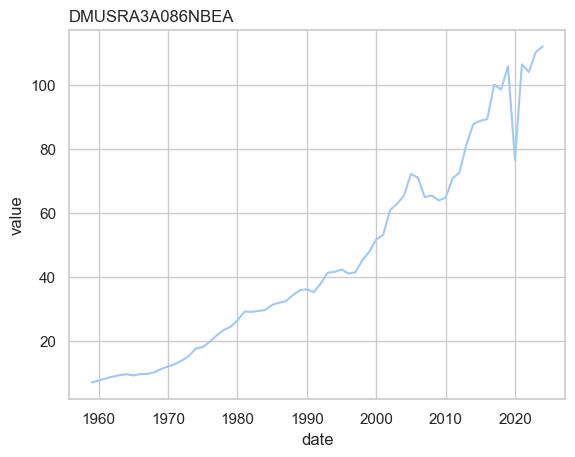

In [40]:
retreive_and_plot_series('DMUSRA3A086NBEA')

In [21]:
#structure url and make request
params = {'series_id':'UNRATE',
          'api_key': api_key,
         'file_type': 'json'}
r = requests.get(url, params = params)

In [22]:
#response code
r

<Response [200]>

In [23]:
#explore the text
r.text[:1000]

'{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","observation_start":"1600-01-01","observation_end":"9999-12-31","units":"lin","output_type":1,"file_type":"json","order_by":"observation_date","sort_order":"asc","count":932,"offset":0,"limit":100000,"observations":[{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":"1948-01-01","value":"3.4"},{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":"1948-02-01","value":"3.8"},{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":"1948-03-01","value":"4.0"},{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":"1948-04-01","value":"3.9"},{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":"1948-05-01","value":"3.5"},{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":"1948-06-01","value":"3.6"},{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":"1948-07-01","value":"3.6"},{"realtime_start":"2025-09-05","realtime_end":"2025-09-05","date":

In [24]:
#turn into json
data = r.json()
data.keys()

dict_keys(['realtime_start', 'realtime_end', 'observation_start', 'observation_end', 'units', 'output_type', 'file_type', 'order_by', 'sort_order', 'count', 'offset', 'limit', 'observations'])

In [25]:
#observations are what we want
data['observations']

[{'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-01-01',
  'value': '3.4'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-02-01',
  'value': '3.8'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-03-01',
  'value': '4.0'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-04-01',
  'value': '3.9'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-05-01',
  'value': '3.5'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-06-01',
  'value': '3.6'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-07-01',
  'value': '3.6'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-08-01',
  'value': '3.9'},
 {'realtime_start': '2025-09-05',
  'realtime_end': '2025-09-05',
  'date': '1948-09-01',
  'value': '3.8'},
 {'realtime_start':

In [26]:
#dataframe of observations
obs_df = pd.DataFrame(data['observations'])
obs_df.head()

realtime_start realtime_end        date value
0     2025-09-05   2025-09-05  1948-01-01   3.4
1     2025-09-05   2025-09-05  1948-02-01   3.8
2     2025-09-05   2025-09-05  1948-03-01   4.0
3     2025-09-05   2025-09-05  1948-04-01   3.9
4     2025-09-05   2025-09-05  1948-05-01   3.5

In [31]:
#look over .info
obs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932 entries, 0 to 931
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   realtime_start  932 non-null    object        
 1   realtime_end    932 non-null    object        
 2   date            932 non-null    datetime64[ns]
 3   value           932 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 29.3+ KB


In [28]:
#change value to float
obs_df['value'] = obs_df['value'].astype('float')

In [30]:
#change date to datetime
obs_df['date'] = pd.to_datetime(obs_df['date'])

In [32]:
#set date to index
obs_df.set_index('date', inplace = True)

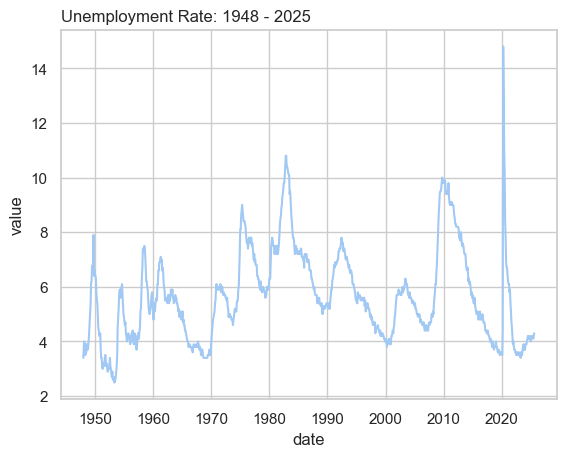

In [33]:
sns.set_theme(style="whitegrid", palette="pastel")
sns.lineplot(data = obs_df,x = obs_df.index,  y = 'value')
plt.title('Unemployment Rate: 1948 - 2025', loc = 'left');

**PROBLEM**

Find another series from the FRED data and create a plot of your response.

### Accessing Data with a Library

The SEC shares much of its data through an API called EDGAR.  There is a library `pyedgar` that allows you to interact with the API [here](https://github.com/joeyism/py-edgar).  Can you use the library to extract filings for a company of your choosing?

In [41]:
!pip install edgar


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [42]:
from edgar import Company, TXTML

company = Company("INTERNATIONAL BUSINESS MACHINES CORP", "0000051143")
doc = company.get_10K()
text = TXTML.parse_full_10K(doc)

In [43]:
print(text[:1000])

 version='1.0' encoding='ASCII'? XBRL Document Created with the Workiva Platform Copyright 2025 Workiva r:e5e4c6dd-a0e3-4a8d-aa78-eb8c6666d274,g:21436d97-1a01-444f-9a49-04dee52d2242,d:af7e987c179946fe9556e9c6006b4d87 ibm-20241231 CHX 0000051143 2024 FY false P5Y P3Y http://fasb.org/us-gaap/2024#Revenues http://fasb.org/us-gaap/2024#Revenues http://fasb.org/us-gaap/2024#Revenues P1Y P1Y http://fasb.org/us-gaap/2024#SellingGeneralAndAdministrativeExpense http://fasb.org/us-gaap/2024#SellingGeneralAndAdministrativeExpense http://fasb.org/us-gaap/2024#SellingGeneralAndAdministrativeExpense P1Y P1Y http://fasb.org/us-gaap/2024#AccountsPayableCurrent http://fasb.org/us-gaap/2024#AccountsPayableCurrent http://fasb.org/us-gaap/2024#PropertyPlantAndEquipmentAndFinanceLeaseRightOfUseAssetAfterAccumulatedDepreciationAndAmortization http://fasb.org/us-gaap/2024#PropertyPlantAndEquipmentAndFinanceLeaseRightOfUseAssetAfterAccumulatedDepreciationAndAmortization http://fasb.org/us-gaap/2024#ShortTermB

### Last FM

The API for Last FM requires an API Key.  Head over [here](https://www.last.fm/api/authentication) to signup for yours -- it should be instantaneous.

In [ ]:
base_url = ''


In [ ]:
#examine the response


In [ ]:
#extract the headline


**Exercise**

Use the `album.GetInfo` method [docs](https://www.last.fm/api/show/album.getInfo) to get information about an album of your choosing. 

### Finding an API

There are many different API's with interesting data out there.  Your goal is to find an API of interest and make a request of the API, structuring the result as a DataFrame.  Record your findings [here](https://forms.gle/WREHMC5xc5VnQhMn9).  